
# Business Cases with Data Science 

## Case 1: Customer Segmentation

#### Semester: Spring 2020
#### Group (Palm & Company) Member:
1. Ana Claudia Alferes (M20190932)
2. Pedro Santos (M20190420)
3. Michael Machatschek (M20190054)
4. Lennart Dangers (M20190251)

#### This project follows the CRISP-DM Process:

1. Business Understanding
2. Data Understanding
3. Data Preparation
4. Modelling
5. Evaluation
6. Deployment

# Step 1: Business Understanding

# Step 2: Data Understanding

## Dataset Description

 Description of each variable 
 
 - var 1 ...
 
 
 
 #### The following code will help to explore and understand the entire dataset. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce
import collections
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
path = "https://raw.githubusercontent.com/lennartda/business_cases_C1/master/Data/Dataset.csv"
df = pd.read_csv(path, sep=";")

In [3]:
#Set ID as an Index: Check if ID only contains unique values
#df.shape: (111733, 29)
#df["ID"].nunique(): 111733
df = df.set_index('ID')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111733 entries, 1 to 111733
Data columns (total 28 columns):
Nationality             111733 non-null object
Age                     107561 non-null float64
DaysSinceCreation       111733 non-null int64
NameHash                111733 non-null object
DocIDHash               110732 non-null object
AverageLeadTime         111733 non-null int64
LodgingRevenue          111733 non-null float64
OtherRevenue            111733 non-null float64
BookingsCanceled        111733 non-null int64
BookingsNoShowed        111733 non-null int64
BookingsCheckedIn       111733 non-null int64
PersonsNights           111733 non-null int64
RoomNights              111733 non-null int64
DistributionChannel     111733 non-null object
MarketSegment           111733 non-null object
SRHighFloor             111733 non-null int64
SRLowFloor              111733 non-null int64
SRAccessibleRoom        111733 non-null int64
SRMediumFloor           111733 non-null int64
SRBa

In [5]:
summary=df.describe(include='all')
summary=summary.transpose()
summary.head(len(summary))

count  unique  \
Nationality           111733     199   
Age                   107561     NaN   
DaysSinceCreation     111733     NaN   
NameHash              111733  107584   
DocIDHash             110732  103480   
AverageLeadTime       111733     NaN   
LodgingRevenue        111733     NaN   
OtherRevenue          111733     NaN   
BookingsCanceled      111733     NaN   
BookingsNoShowed      111733     NaN   
BookingsCheckedIn     111733     NaN   
PersonsNights         111733     NaN   
RoomNights            111733     NaN   
DistributionChannel   111733       4   
MarketSegment         111733       7   
SRHighFloor           111733     NaN   
SRLowFloor            111733     NaN   
SRAccessibleRoom      111733     NaN   
SRMediumFloor         111733     NaN   
SRBathtub             111733     NaN   
SRShower              111733     NaN   
SRCrib                111733     NaN   
SRKingSizeBed         111733     NaN   
SRTwinBed             111733     NaN   
SRNearElevator        111733     NaN   
SRAwayFromElevator    111733     NaN   
SRNoAlcoholInMiniBar  111733     NaN   
SRQuietRoom           111733     NaN   

                                                                    top  \
Nationality                                                         FRA   
Age                                                                 NaN   
DaysSinceCreation                                                   NaN   
NameHash              0x15A713CE687991691A18F6CDC56ABE24979C73CF5D51...   
DocIDHash             0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...   
AverageLeadTime                                                     NaN   
LodgingRevenue                                                      NaN   
OtherRevenue                                                        NaN   
BookingsCanceled                                                    NaN   
BookingsNoShowed                                                    NaN   
BookingsCheckedIn                                                   NaN   
PersonsNights                                                       NaN   
RoomNights                                                          NaN   
DistributionChannel                               Travel Agent/Operator   
MarketSegment                                                     Other   
SRHighFloor                                                         NaN   
SRLowFloor                                                          NaN   
SRAccessibleRoom                                                    NaN   
SRMediumFloor                                                       NaN   
SRBathtub                                                           NaN   
SRShower                                                            NaN   
SRCrib                                                              NaN   
SRKingSizeBed                                                       NaN   
SRTwinBed                                                           NaN   
SRNearElevator                                                      NaN   
SRAwayFromElevator                                                  NaN   
SRNoAlcoholInMiniBar                                                NaN   
SRQuietRoom                                                         NaN   

                       freq         mean        std  min  25%  50%    75%  \
Nationality           16516          NaN        NaN  NaN  NaN  NaN    NaN   
Age                     NaN      45.6392     17.245  -10   33   47     58   
DaysSinceCreation       NaN      595.027    374.657   36  288  522    889   
NameHash                 75          NaN        NaN  NaN  NaN  NaN    NaN   
DocIDHash              3032          NaN        NaN  NaN  NaN  NaN    NaN   
AverageLeadTime         NaN      60.8331    85.1153   -1    0   21     95   
LodgingRevenue          NaN      283.851    379.132    0    0  208  393.3   
OtherRevenue            NaN      64.6828    123.581    0    0   31    

In [6]:
df.isnull().sum()

Nationality                0
Age                     4172
DaysSinceCreation          0
NameHash                   0
DocIDHash               1001
AverageLeadTime            0
LodgingRevenue             0
OtherRevenue               0
BookingsCanceled           0
BookingsNoShowed           0
BookingsCheckedIn          0
PersonsNights              0
RoomNights                 0
DistributionChannel        0
MarketSegment              0
SRHighFloor                0
SRLowFloor                 0
SRAccessibleRoom           0
SRMediumFloor              0
SRBathtub                  0
SRShower                   0
SRCrib                     0
SRKingSizeBed              0
SRTwinBed                  0
SRNearElevator             0
SRAwayFromElevator         0
SRNoAlcoholInMiniBar       0
SRQuietRoom                0
dtype: int64

In [7]:
# Check counts of categorical variables (excluding nationality)
cols = ['MarketSegment']
df[cols].apply(pd.Series.value_counts)

MarketSegment
Other                          63680
Direct                         16363
Travel Agent/Operator          16353
Groups                         11461
Corporate                       2931
Complementary                    657
Aviation                         288

In [8]:
cols = ['DistributionChannel']
df[cols].apply(pd.Series.value_counts)

DistributionChannel
Travel Agent/Operator                91019
Direct                               16883
Corporate                             3135
GDS Systems                            696

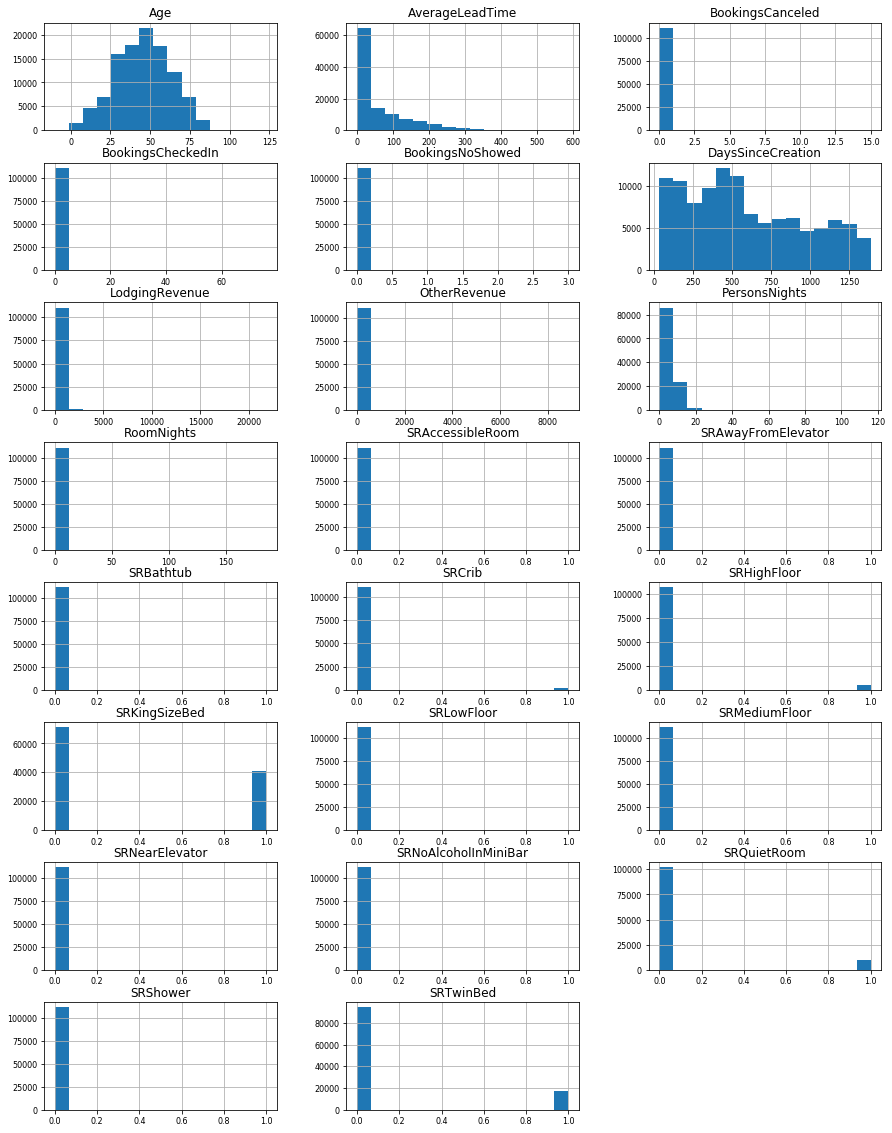

In [9]:
# Do histograms on all numeric variables
numerical=df.select_dtypes(include=[np.number]).columns.tolist()
df[numerical].hist(bins=15, figsize=(15, 20), layout=(8, 3), xlabelsize=8, ylabelsize=8);

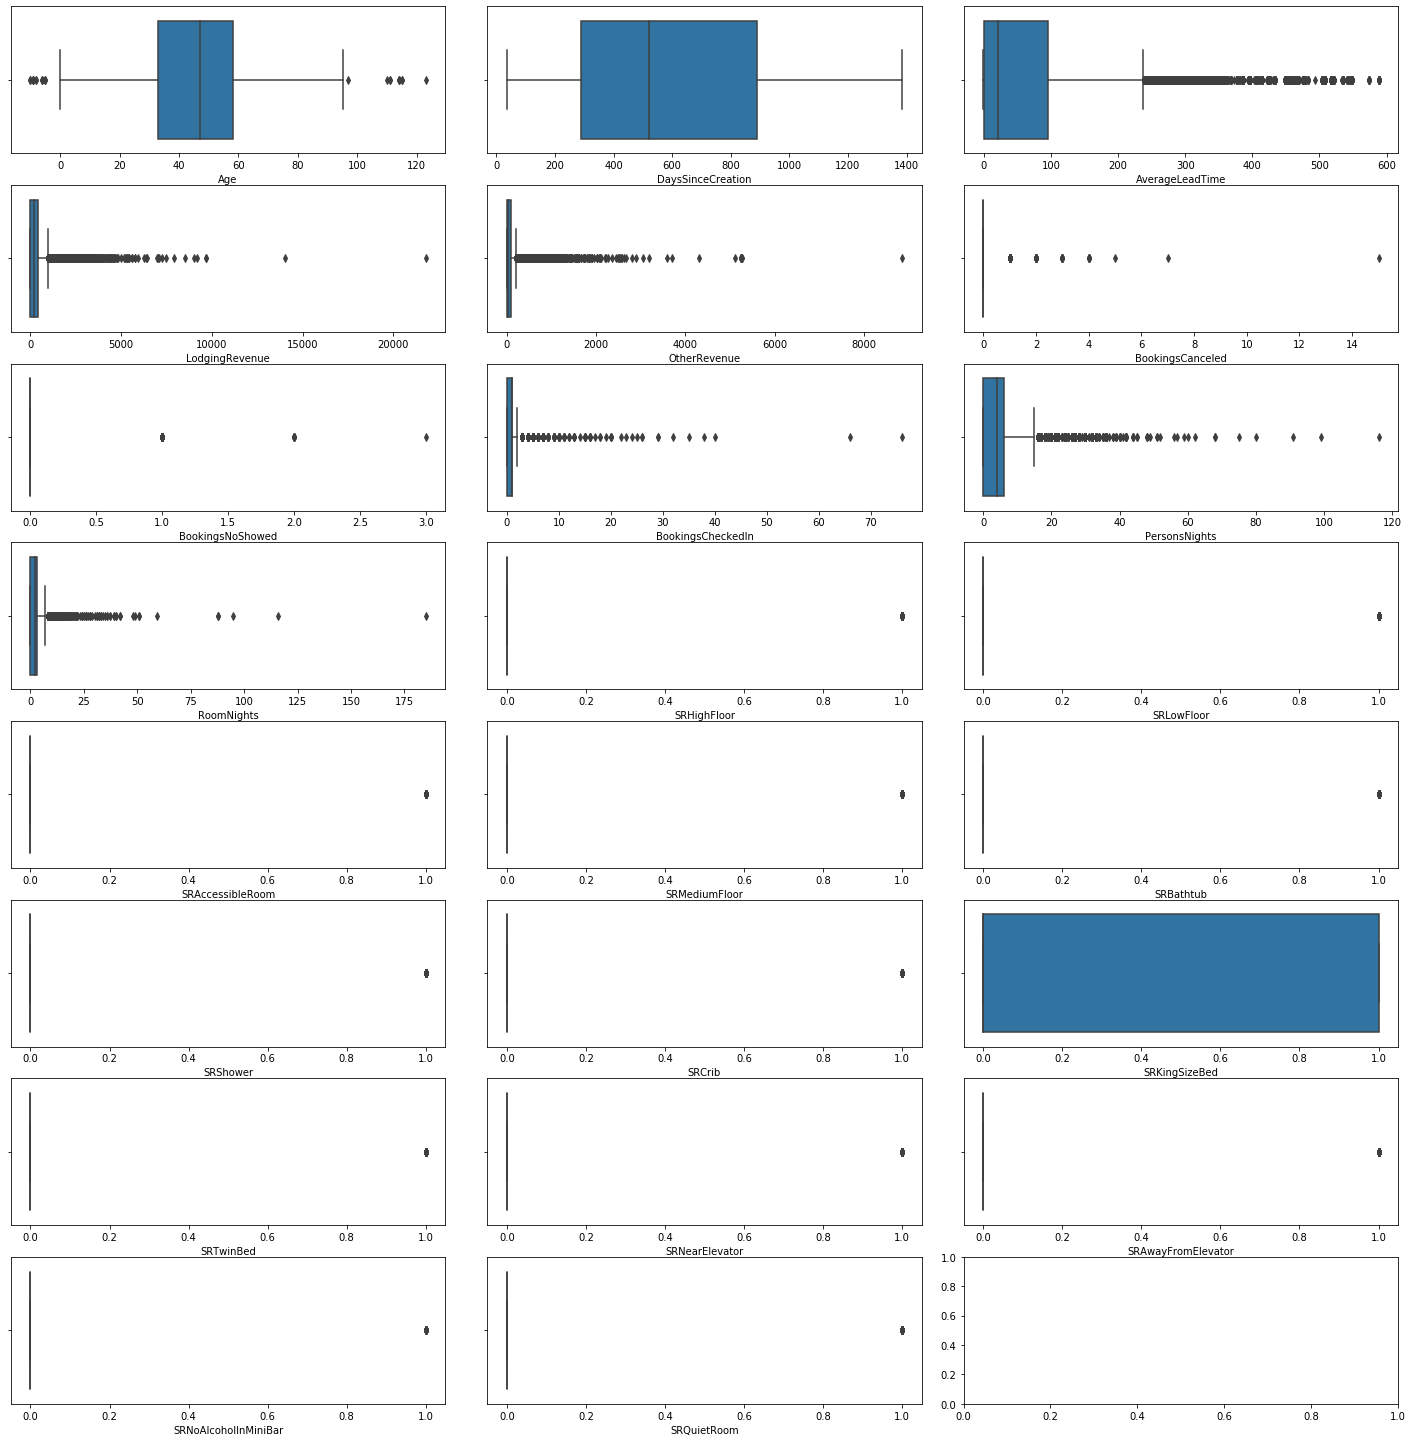

In [10]:
#boxplots to detect outliers
fig, ax = plt.subplots(8, 3, figsize=(20, 20))
fig.tight_layout()
for var, subplot in zip(df[numerical], ax.flatten()):
    sns.boxplot(df[var], ax=subplot)

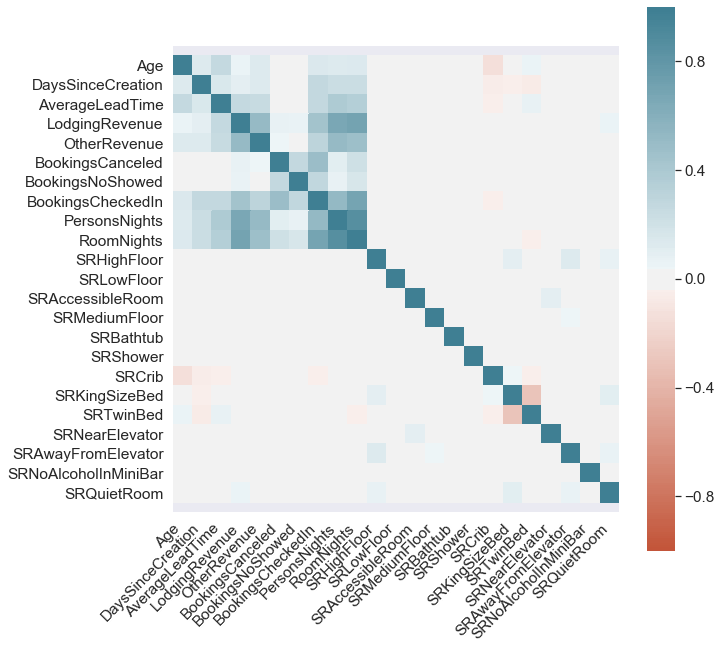

In [11]:
corr = df[numerical].corr()
plt.figure(figsize=(10, 10))
sns.set(font_scale=1.4)
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=False, annot_kws={"size": 12}
)
bottom, top = ax.get_ylim() # These two lines were added due to bug on current Seaborn version
ax.set_ylim(bottom + 0.5, top - 0.5) #
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [12]:
# Doc ID NaNs 
df[(df.BookingsCheckedIn != 0) & (df.DocIDHash !=df.DocIDHash)].T #Attended bookings

df[(df.BookingsCheckedIn == 0) & (df.DocIDHash !=df.DocIDHash)].T #Never been and no doc

df[(df.BookingsCheckedIn == 0) & (df.BookingsCanceled == 0)& (df.BookingsNoShowed == 0)] #Never been

Nationality   Age  DaysSinceCreation  \
ID                                            
3              DEU  32.0               1385   
5              FRA  52.0               1385   
7              JPN  50.0               1385   
9              FRA  43.0               1385   
11             IRL  28.0               1385   
13             FRA  57.0               1385   
15             ESP  58.0               1385   
18             FRA  72.0               1385   
20             FRA  27.0               1385   
23             NLD  53.0               1385   
25             FRA  37.0               1385   
28             FRA  66.0               1385   
33             PRT  42.0               1385   
35             PRT   4.0               1385   
36             PRT  64.0               1385   
38             DEU  29.0               1385   
42             ITA  19.0               1385   
44             FRA  53.0               1385   
46             ITA  18.0               1385   
48             CHN  27.0               1385   
51             POL  54.0               1385   
54             ITA  33.0               1385   
58             ITA  37.0               1385   
62             ITA  49.0               1385   
65             HUN  60.0               1385   
68             FRA  14.0               1385   
69             FRA  52.0               1385   
71             ESP  62.0               1385   
73             FRA  70.0               1384   
75             FRA  56.0               1384   
...            ...   ...                ...   
111669         CAN  68.0                 37   
111671         CAN  74.0                 37   
111673         PRT  28.0                 37   
111675         CAN  53.0                 37   
111677         PRT  32.0                 37   
111679         CAN  60.0                 37   
111681         CAN  60.0                 37   
111683         BRA   1.0                 37   
111684         BRA  34.0                 37   
111686         GBR  58.0                 37   
111688         CHE  48.0                 37   
111690         GBR  60.0                 37   
111692         CAN  60.0                 37   
111694         BEL  61.0                 37   
111696         CHE  50.0                 37   
111698         CAN  65.0                 37   
111702         FRA  27.0                 37   
111705         CAN  53.0                 37   
111708         GBR  23.0                 37   
111709         DEU  22.0                 37   
111711         GBR  36.0                 37   
111714         CAN  75.0                 37   
111716         CAN  72.0                 37   
111719         NLD  22.0                 37   
111721         DEU  24.0                 37   
111724         ITA  56.0                 37   
111726         PAN  60.0                 37   
111729         DEU  31.0                 36   
111731         BRA  37.0                 36   
111733         DEU  48.0                 36   

                                                 NameHash  \
ID                                                          
3       0xDA46E62F66936284DF2844EC4FC542D0DAD780C0EE0C...   
5       0xD2E3D5BFCA141865669F98D64CDA85AD04DEFF47F8A0...   
7       0x94DB830C90A6DA2331968CFC9448AB9A3CE07D7CFEDD...   
9       0x44BB41EF2D87698E75B6FBB77A8815BF48DAA912C140...   
11      0x606584F7B9D6A1905BF9B7ED7B7EBE5DF17DF22FECDF...   
13      0x4DCD77E3D2E2CC9E22007657A9FD76DC517A32B6AFED...   
15      0x687F687634AB73BF29FF942F4E32781663FE00ACAD25...   
18      0xA72500CAF0F282A35AA333F7F3D09CE0157F6AEAB525...   
20      0x60D60695D7E3650D5C35B0DF105F85134450F8456C4D...   
23      0x1BF98EF4538DCA9239D75C087B7771C84908600A05E3...   
25      0xD1721CD59CEFC9A30A2B9E05C26CD8D621D064CA5AB1...   
28      0xB5C97121D72088908F91049EC6027F5349472C0F46F4...   
33      0xCD370C60479B203E6EAA61BC39625A89AF23FD5644AB...   
35      0xD01C4194E347210450E554E5862B791E1DF97238D0DA...   
36      0x2892853ACDE4F91C8DB84FF2FB21F65B83180956A75C...   
38      

# Step 3: Data Preparation

In [13]:
X = df.copy(deep= True)

In [14]:
# Remove columns that should not be used as they do not represent customer's characteristics or behavior
cols = ['MarketSegment']
X.drop(columns=cols, inplace=True)

In [15]:
# Drop customers with zero revenue but positive checkins, because we assume these are mostly bookings from staff
X = X[~((X.LodgingRevenue == 0)&(X.BookingsCheckedIn >=1))] 

# Drop customers with zero cancellend, no show and checked in bookings, because we assume that these are from older systems
X = X[~((X.BookingsCanceled == 0)&(X.BookingsNoShowed == 0)&(X.BookingsCheckedIn ==0))] 

In [16]:
X["IDMerge"] = X.DocIDHash + " + " +X.NameHash + " + "+X.Nationality

In [17]:
#Merge remaining duplicated rows with same DocIdHash
def modef(x):
    return x.mode()[0]

aggregation_functions = {'Nationality': modef, 'Age': 'mean', 'DaysSinceCreation': 'first','NameHash': 'first','AverageLeadTime': 'mean'
                        ,'LodgingRevenue': 'sum','OtherRevenue': 'sum','BookingsCanceled': 'sum','BookingsNoShowed': 'sum','BookingsCheckedIn': 'sum','PersonsNights': 'sum','RoomNights': 'sum'
                        ,'DistributionChannel': modef,'SRHighFloor': "last",'SRLowFloor':"last",'SRAccessibleRoom': "last",'SRMediumFloor':"last",
                        'SRBathtub': "last",'SRShower': "last",'SRCrib': "last",'SRKingSizeBed': "last",
                        'SRTwinBed': "last",'SRNearElevator': "last",'SRAwayFromElevator': "last",'SRNoAlcoholInMiniBar': "last",
                        'SRQuietRoom': "last"}

X_new = X.groupby(X['IDMerge']).aggregate(aggregation_functions)
X_new = X_new.reset_index()

In [18]:
# Outlier handling 
# Treat negative AverageLeadTime as real time booking; averageleadtime = 0
#X_new[X_new.AverageLeadTime>360]

# Everything looks fine
#X_new[X_new.LodgingRevenue > 10000]

#Create a new feature to check for outliers
X_new["PricePerNight"] = X_new.LodgingRevenue / X_new.RoomNights
# Everything looks fine

#X_new[X_new.PricePerNight > 1500]

# Everything looks fine
#X_new[X_new.OtherRevenue > 4000]

#Create a new feature to check for outliers
X_new["OtherRevenuePerPersonNight"] = X_new.OtherRevenue / X_new.PersonsNights
#Remove inf cases
X_new = X_new[X_new.OtherRevenuePerPersonNight < 10000]


# Everything looks fine apart from inf
#X_new[X_new["OtherRevenuePerPersonNight"]>1000]

# Only 1 case where looks like staff (2.2€per night). Define a min price per night and drop customers below.
#X_new[X_new.BookingsCanceled > 14]

#Most clients have decent price per night/other revenue (most are corporate) and theres the staff guy from above.
#X_new[X_new.BookingsCheckedIn > 30]

#Most clients have decent price per night/other revenue (also they are corporate) and theres the staff guy from above.
#X_new[X_new.PersonsNights > 80]

#Most clients have decent price per night/other revenue (also they are corporate) and theres the staff guy from above.
#X_new[X_new.RoomNights > 75]





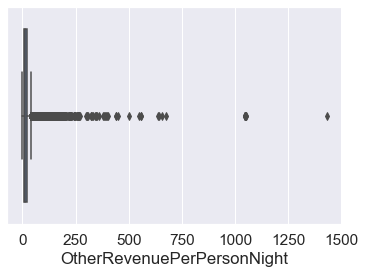

In [19]:
sns.boxplot(X_new["OtherRevenuePerPersonNight"])

In [20]:
X_new[X_new.RoomNights>X_new.PersonsNights]
#Check why this happens w/ teacher

IDMerge Nationality   Age  \
2340   0x08007328E88BA93B551B9F9F056AAFE2C00E94CCEE69...         PRT  45.0   
11593  0x27A6504F8E07DC750D565994E86CB3837146A501E609...         ESP  50.0   
11923  0x28D83B97B0D5B78BCBA1C36FDF79FF276A1E32C9CB5C...         PRT  34.0   
12576  0x2B17E9D2CCEF2EA0FE752EE345BEDFB06741FFC8ECEC...         PRT  48.0   
18324  0x3FAE56E6A0168E9130F12E58CF45CDAAE18477EF809C...         GRC  52.0   
22334  0x4DA48EED943299176444C244EAA74FACB04E8E66DE82...         PRT  66.0   
26848  0x5DC0150F4FDDED43B313C3782560597AC6665A129EF5...         PRT  46.0   
28984  0x6541AF2C1E55C2D3EC17E89DEDD22FE0EBB47AB92305...         PRT  49.0   
37749  0x849546932E0ABE7515ECA03635FD1334BBBCC41E0AFD...         BRA  33.0   
44925  0x9E0C31D4C3A418F0B4E063504160A0B33D51C6ABA0A4...         PRT   NaN   
45768  0xA0EA86D350113A03143831212044DE6CE61C2484CB18...         USA  47.0   
46913  0xA508EDBFE269E231546629F11587FA2AAD4DE4851A31...         ESP  52.0   
54273  0xBEDD3BDEFDC2F17B6B52D1133594F2A0A60D7D665DEB...         ISR  31.0   
60273  0xD37A405EAA2BF8D23CB44A9AE3C2A7BEC4C5A726BEE2...         PRT  38.0   
64634  0xE2836653FBF39129A11F69F1FC6635CCCD8FA5C7A5E1...         PRT  46.0   
65189  0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...         ESP   NaN   
66644  0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...         PRT   NaN   
67178  0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...         PRT   NaN   
73164  0xF728641F469966A5AA8906B76CC8C3083A0BDEC9F24F...         PRT   NaN   
75393  0xFF1985F366C218F0D7D8280480B6B8AD82CAF6092799...         HRV  43.0   

       DaysSinceCreation                                           NameHash  \
2340                1288  0x84DF93E126886E0003E45A8B0A1127EDDDA6A3BEC276...   
11593                736  0x53FB0EB1CE1FD50424F79500C54F8149081D5A3D82F6...   
11923                489  0xFB5F026540ECB47362289BB2507D92BED41D80F632F6...   
12576               1323  0xFB64B4B6AB53A6A549A620009CA24A1C3A668A460D87...   
18324                901  0x04F37DBBE0138585CD31BC820E2C780F992915176507...   
22334               1189  0xE779FF69A9BC8AA6FE091759A095386C0E2A8F680DA8...   
26848                466  0x7A8179ADB882FC633830D7EABDCD64D41B3CD539FEA2...   
28984               1112  0xF4F7ED49904EB1F7A72F33A071F96CE533019C81DF96...   
37749                319  0x3CBB385BBFE0BCBAC87A0F4FE0BFA648DE33905384F4...   
44925                426  0x27749A514C58DA6E2F5544303DD02E378631187B08EF...   
45768               1057  0x82FDEEE5403B80470AABEC952A25DB7D37BEF253BD5C...   
46913                929  0xDF5D8EAC38850FC98D7D5822110B10A44662D9D92279...   
54273                155  0x5015AE870F1DEECA791D3744CD4ED3CAA95B22C43A5B...   
60273                905  0x257B8DC0708BF75D2A3869648C15B36317B272A1D69B...   
64634                560  0x4FC57FA3A9C4A4096E55BFD5AACE40D3627748CB65E4...   
65189                377  0x14A77C11BA7C3B13207E72D4BA395580338D206DCA65...   
66644                625  0xA54BF56198FA66C8414FE1AEB3680DC262B8EE9ACC21...   
67178                103  0xD9A501DB0F0303E3FD9B2FCD27B28411ACE0486F77C0...   
73164               1315  0x382BF2A6BF57870D9831631A7ACA7B30CB42FE9FEEDF...   
75393                892  0xF2A1083BA0F2D0B18B86816CD820DAD61C3818A4A828...   

       AverageLeadTime  LodgingRevenue  OtherRevenue  BookingsCanceled  \
2340         75.000000          138.00         38.50                 0   
11593        15.250000         1931.00        133.00                 0   
11923         0.000000          459.00         42.00                 0   
12576        34.066667        11740.65       3066.50                 5   
18324         7.000000         3066.00        347.30                 0   
22334        38.000000         1239.00        230.00                 4   
26848         3.000000          269.00          7.00                 0   
28984         0.000000          858.15        114.00                 0   
37749         0.000000          524.87        242.50                 0   
44925     

In [21]:
#Filling NaNs in Age
X_new[X_new.Age >100 ]
#Drop Nans, negatives and values above 100 and then try to recluster them 
dropped_age = X_new[(X_new.Age >100)|(X_new.Age <0)|(X_new.Age != X_new.Age)]
X_new = X_new[~((X_new.Age >100)|(X_new.Age <0)|(X_new.Age != X_new.Age))]


In [22]:
#Feature Engineering 
#Already created the price per room + other revenue per person per night 
X_new["PersonPerRoom"] = X_new.PersonsNights / X_new.RoomNights
X_new["AvgNights"] = X_new.PersonsNights / X_new.BookingsCheckedIn / X_new.PersonPerRoom
X_new["GroupSize"] = round(X_new.PersonsNights / X_new.BookingsCheckedIn / X_new.AvgNights,0)

In [23]:
#Age Binning

X_new["AgeBinned"] = X_new.Age.apply(lambda x: '0-24' if x >= 0 and x <=24 else ('25-44' if x>=25 and x<=44 else ('45-64' if x>=45 and x<=64 else '65+')))
X_new.AgeBinned.value_counts()


45-64    31613
25-44    26481
65+      11025
0-24      3799
Name: AgeBinned, dtype: int64

In [24]:
#AvgNights binning
#1-2 Short Stay
#3-4 Medium
#5+ Long

X_new["AvgNightsBinning"] = X_new.AvgNights.apply(lambda x: '1-2' if x>=0 and x<=2.5 else ('3-4' if x>2.5 and x<=4.5 else '5+'))
X_new.AvgNightsBinning.value_counts()

3-4    32843
1-2    28748
5+     11327
Name: AvgNightsBinning, dtype: int64

In [25]:
#GroupSize Binning
#1
#2
#3+
X_new["GroupSizeBinned"] = X_new.GroupSize.apply(lambda x: '1' if x ==1  else ('2' if x==2 else '3+'))
X_new.GroupSizeBinned.value_counts()


2     47028
1     15789
3+    10101
Name: GroupSizeBinned, dtype: int64

In [26]:
#AverageLeadTime binning
#0-7
#8-30
#31-120
#121-365
#366+

X_new["LeadTimeBinned"] = X_new.AverageLeadTime.apply(lambda x: '0-7' if x>=0 and x<8 else ('8-30' if x>=8 and x<31 else ('31-120' if x>=31 and x<121 else('121-365' if x>=121 and x<366 else '366+'))))


In [27]:
#DaysSinceCreation binning
#0-60
#60-365
#365-730
#730+

X_new["DaysSinceCreationBinned"] = X_new.DaysSinceCreation.apply(lambda x: '0-120' if x>=0 and x<=120 else ('121-365' if x>=121 and x<=365 else ('366-730' if x>=366 and x<=730 else'731+')))


In [28]:
#PersonPerRoom
#0-1,5
#1,5-2,5
#2,5 +

X_new["PersonPerRoomBinned"] = X_new.PersonPerRoom.apply(lambda x: '1' if x <1.5 else ('2' if x>=1.5 and x<2.5 else '3+'))


In [29]:
#Feature engineering part2
#OneHotEncode the categorical variables,
categoricals = ["DistributionChannel", "GroupSizeBinned","AgeBinned","LeadTimeBinned", "DaysSinceCreationBinned","PersonPerRoomBinned", "AvgNightsBinning"]

dummies = pd.get_dummies(X_new[categoricals], prefix_sep='_')
X_new_2 = X_new.merge(dummies, left_index = True, right_index=True )

In [30]:
#Drop unnecessary columns for PCA
X_new_2.drop(["IDMerge", "Nationality","GroupSizeBinned","GroupSize","PersonsNights","AvgNights","RoomNights","AvgNightsBinning","BookingsCheckedIn","BookingsNoShowed","BookingsCanceled","PersonPerRoom","PersonPerRoomBinned", "Age", "DaysSinceCreationBinned","DaysSinceCreation","AgeBinned","LodgingRevenue","OtherRevenue", "LeadTimeBinned", "NameHash","AverageLeadTime","DistributionChannel"],axis=1, inplace=True)
#Standardize with MinMax
X_model = X_new_2.copy(deep=True)

cols = list(X_model.columns) # save the name of the columns 

X_model_array = X_model.values # returns a numpy array 

min_max_scaler = preprocessing.MinMaxScaler() 

X_model_scaled = min_max_scaler.fit_transform(X_model_array) 

X_model_norm = pd.DataFrame(X_model_scaled, columns=cols) 

In [31]:
#preview normalized df
X_model_norm.head(1).T

0
SRHighFloor                                0.000000
SRLowFloor                                 0.000000
SRAccessibleRoom                           0.000000
SRMediumFloor                              0.000000
SRBathtub                                  0.000000
SRShower                                   0.000000
SRCrib                                     0.000000
SRKingSizeBed                              1.000000
SRTwinBed                                  0.000000
SRNearElevator                             0.000000
SRAwayFromElevator                         0.000000
SRNoAlcoholInMiniBar                       0.000000
SRQuietRoom                                1.000000
PricePerNight                              0.072606
OtherRevenuePerPersonNight                 0.018855
DistributionChannel_Corporate              0.000000
DistributionChannel_Direct                 1.000000
DistributionChannel_GDS Systems            0.000000
DistributionChannel_Travel Agent/Operator  0.000000
GroupSizeBinned_1                          0.000000
GroupSizeBinned_2                          1.000000
GroupSizeBinned_3+                         0.000000
AgeBinned_0-24                             0.000000
AgeBinned_25-44                            0.000000
AgeBinned_45-64                            1.000000
AgeBinned_65+                              0.000000
LeadTimeBinned_0-7                         0.000000
LeadTimeBinned_121-365                     0.000000
LeadTimeBinned_31-120                      1.000000
LeadTimeBinned_366+                        0.000000
LeadTimeBinned_8-30                        0.000000
DaysSinceCreationBinned_0-120              0.000000
DaysSinceCreationBinned_121-365            0.000000
DaysSinceCreationBinned_366-730            1.000000
DaysSinceCreationBinned_731+               0.000000
PersonPerRoomBinned_1                      0.000000
PersonPerRoomBinned_2                      1.000000
PersonPerRoomBinned_3+                     0.000000
AvgNightsBinning_1-2                       1.000000
AvgNightsBinning_3-4                       0.000000
AvgNightsBinning_5+                        0.000000

(72918, 2)


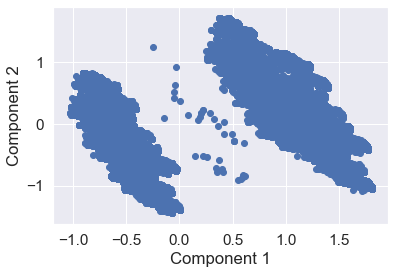

In [32]:
#PCA
pca2 = PCA(n_components = 2)
pca2.fit(X_model_norm)
X_pca2 = pca2.transform(X_model_norm) # Apply the dimension reduction to the dataset
print(X_pca2.shape)

# Plot a scatter plot of the two Principal Components by the "target" to see if there is any pattern
plt.scatter(X_pca2[:, 0], X_pca2[:, 1])
plt.xlabel('Component 1')
plt.ylabel('Component 2');
#Around 6 clusters are observable

In [33]:
# Fit the PCA algorithm to data 
pca = PCA().fit(X_model_norm)

# Show the variance per component
pcaevr = ['{:f}'.format(item) for item in pca.explained_variance_ratio_]
pcaDF = pd.DataFrame({'Component': range(1, len(X_model_norm.columns)+1),
                      'Variance explained': pcaevr,
                      'Cumulative variance explained': np.cumsum(pca.explained_variance_ratio_)})
pcaDF

Component Variance explained  Cumulative variance explained
0           1           0.170421                       0.170421
1           2           0.099904                       0.270325
2           3           0.089142                       0.359466
3           4           0.081624                       0.441090
4           5           0.072838                       0.513929
5           6           0.069883                       0.583812
6           7           0.060402                       0.644214
7           8           0.055431                       0.699645
8           9           0.046676                       0.746321
9          10           0.045450                       0.791771
10         11           0.041529                       0.833300
11         12           0.037960                       0.871260
12         13           0.030641                       0.901901
13         14           0.021428                       0.923328
14         15           0.017709                       0.941038
15         16           0.016502                       0.957540
16         17           0.014034                       0.971574
17         18           0.008842                       0.980416
18         19           0.008573                       0.988989
19         20           0.003524                       0.992513
20         21           0.002296                       0.994809
21         22           0.002210                       0.997019
22         23           0.000814                       0.997833
23         24           0.000658                       0.998491
24         25           0.000377                       0.998868
25         26           0.000333                       0.999201
26         27           0.000280                       0.999481
27         28           0.000164                       0.999646
28         29           0.000120                       0.999766
29         30           0.000084                       0.999849
30         31           0.000054                       0.999903
31         32           0.000049                       0.999952
32         33           0.000031                       0.999983
33         34           0.000017                       1.000000
34         35           0.000000                       1.000000
35         36           0.000000                       1.000000
36         37           0.000000                       1.000000
37         38           0.000000                       1.000000
38         39           0.000000                       1.000000
39         40           0.000000                       1.000000
40         41           0.000000                       1.000000

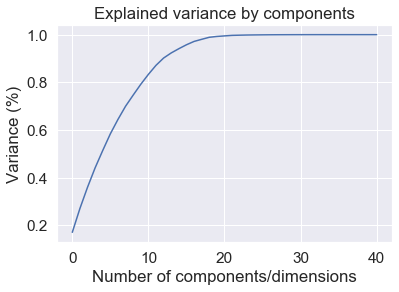

In [34]:
# Plot the cumulative explained variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components/dimensions')
plt.ylabel('Variance (%)')
plt.title('Explained variance by components')
plt.show()

In [35]:
#Modeling Kmeans based on 19 PCAs

pca_reduced = PCA(n_components = 17)
pca_reduced.fit(X_model_norm)
X_pca_reduced = pca_reduced.transform(X_model_norm) 
print(X_pca_reduced.shape)

(72918, 17)


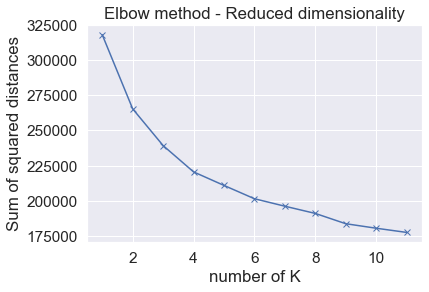

In [36]:
# Select K based on the sum of squared distances 

ssd = [] 

K = range(1,12) 

for k in K: 

    km = KMeans(n_clusters=k, random_state=123) 

    km = km.fit(X_pca_reduced) 

    ssd.append(km.inertia_) 

# Plot results in an elbow graph 

plt.plot(K, ssd, 'bx-') 

plt.xlabel('number of K') 

plt.ylabel('Sum of squared distances') 

plt.title('Elbow method - Reduced dimensionality') 

plt.show() 

   

In [37]:
# Apply the K-Means for K= 6 based on first 2 PC .... #fixed random_state!  6
K= 6

kmeans = KMeans(n_clusters=K, random_state=120
            ) 

kmeans.fit(X_pca_reduced) 

y_kmeans = kmeans.predict(X_pca_reduced) 

X_model["Cluster"]=y_kmeans
#add cluster to x-new

In [38]:
X_model.Cluster.value_counts()

2    16186
1    15922
3    14920
5    10096
0     9059
4     6735
Name: Cluster, dtype: int64

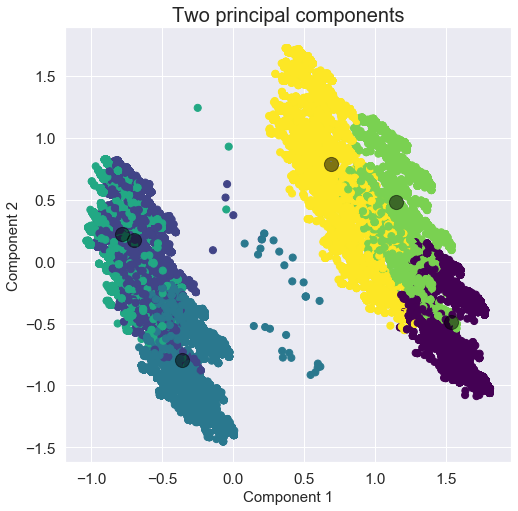

In [39]:
# Plot results two principal components
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Component 1', fontsize = 15)
ax.set_ylabel('Component 2', fontsize = 15)
ax.set_title('Two principal components', fontsize = 20)
ax.scatter(X_pca_reduced[:, 0], X_pca_reduced[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
ax.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

In [40]:
# Create a dataframe with the weights per component
wheightsDF = pd.DataFrame(pca.components_,columns=X_model_norm.columns)
wheightsDF

SRHighFloor    SRLowFloor  SRAccessibleRoom  SRMediumFloor     SRBathtub  \
0  -1.256432e-02 -4.367799e-04     -1.191609e-04  -2.055228e-04 -8.283162e-04   
1   1.002829e-03  6.838834e-04     -7.098380e-05   1.455671e-04 -6.372557e-04   
2   3.904889e-03 -3.068037e-04     -1.718467e-04  -3.789909e-04  1.774461e-03   
3   1.941286e-03 -3.556197e-04      1.835917e-05   1.515781e-04 -7.045392e-05   
4   8.180562e-03 -1.023496e-05     -4.420749e-05   9.558385e-05  7.444460e-04   
5   1.428813e-02  8.720884e-04     -1.710082e-04   2.019872e-04  7.072762e-04   
6  -2.540695e-02 -2.271464e-04      2.622688e-05   3.800065e-04 -7.409974e-04   
7   2.397134e-02 -1.065190e-04      1.423100e-04  -6.072582e-05  3.977742e-03   
8  -1.869755e-02 -2.872867e-05     -4.117138e-05  -9.793971e-05  1.727448e-03   
9   1.784878e-02  5.740624e-04     -2.040299e-04   2.441096e-04  2.701467e-03   
10  2.444544e-03 -5.079997e-04      3.348956e-04  -3.254889e-04  1.959621e-03   
11  7.296314e-04  9.402508e-04      2.421307e-05   3.456571e-04  1.931620e-03   
12 -9.567494e-04 -4.751243e-04     -2.217529e-04  -5.961517e-04 -7.836602e-04   
13  6.933123e-02  7.036333e-04      3.403884e-04   1.004754e-03  2.473199e-03   
14  7.452931e-02  1.464618e-03     -7.310070e-06   1.118832e-03  3.175874e-03   
15 -1.059774e-02  7.378658e-04     -1.617091e-04   8.374423e-04 -1.508308e-03   
16  1.234409e-02 -1.341588e-03     -1.691966e-04  -1.732962e-04  9.716112e-05   
17  7.447396e-01 -2.187729e-03     -3.693155e-04  -1.345416e-03  7.128876e-03   
18  6.560901e-01 -4.805220e-04     -7.264048e-05   4.256863e-04  2.689901e-03   
19  1.958151e-02 -1.681747e-03     -2.643635e-04  -8.826941e-04 -5.197744e-05   
20  3.253419e-03  5.000834e-05     -1.400802e-04   9.020726e-04  1.653428e-02   
21 -1.516579e-03  1.272291e-03     -2.329843e-04  -5.610058e-04  1.449122e-03   
22 -3.832850e-02  3.354014e-03     -1.516284e-04   1.733826e-02  1.449403e-02   
23 -7.079879e-03  5.686860e-03     -3.527130e-04   4.755652e-03  9.994707e-01   
24 -3.238855e-03 -6.139902e-03      1.877773e-02   1.233429e-02  9.153193e-03   
25 -2.254569e-03  1.460859e-04     -1.416866e-04   5.678690e-03  1.765059e-02   
26  1.998897e-03  9.995983e-01      1.338302e-02   2.287675e-02 -5.787467e-03   
27  1.263711e-03 -2.290128e-02      2.065443e-04   9.988207e-01 -5.083640e-03   
28 -6.903262e-05  1.064567e-03     -2.919825e-04   2.394812e-03  6.182888e-04   
29 -9.413377e-04 -2.101650e-03      2.054399e-01  -3.559247e-02  5.935708e-04   
30  5.340533e-04 -1.312349e-02      9.783329e-01   6.724937e-03  1.579275e-04   
31  2.119911e-04  1.335141e-03      1.123772e-02  -5.717828e-04 -7.647643e-04   
32  2.012899e-04  2.071367e-04      3.002196e-04   2.292339e-04  2.531746e-04   
33  9.669978e-05  1.517060e-04      1.631975e-04   1.396439e-04  2.416464e-04   
34 -3.444734e-16  7.333567e-16      1.495157e-15   9.918870e-17  9.225712e-16   
35 -0.000000e+00  2.638966e-17     -1.953466e-15  -1.284781e-15 -2.337246e-16   
36  0.000000e+00  1.035819e-15     -9.010766e-16   7.853653e-16  1.113629e-15   
37  0.000000e+00 -1.212987e-15      1.202522e-15   5.608578e-16  5.418969e-16   
38 -0.000000e+00 -4.884067e-16     -1.655000e-15   3.937815e-16 -1.249393e-15   
39  0.000000e+00  3.231824e-16     -2.288617e-16  -7.809965e-16 -4.603417e-17   
40  0.000000e+00  1.060827e-15      1.765252e-16   4.414015e-16  5.366777e-16   

        SRShower        SRCrib  SRKingSizeBed     SRTwinBed  SRNearElevator  \
0  -8.788787e-04 -3.792962e-04  -6.439353e-02 -7.546345e-02    2.641475e-05   
1  -5.427944e-06 -2.184728e-03   5.581444e-02 -5.260600e-02    7.934164e-05   
2   1.308616e-04  1.145714e-02   6.625719e-02 -3.837647e-02   -1.376403e-04   
3  -2.958526e-04  6.529982e-03   1.347519e-02 -1.179672e-02   -2.804454e-04   
4   6.842451e-04  1.216349e-02   4.841550e-02  7.103021e-02   -1.944484e-04   
5  -2.439003e-04  9.165591e-03  -9.193245e-03  3.507224e-02    4.768916e-06   
6   3.009762e-04  2.933642e-05  -7.235589e-01  2.

In [41]:
# Study the weights of component 17
comp = abs(wheightsDF.iloc[16]) 
comp = comp.sort_values(ascending=False)
comp

AgeBinned_0-24                               0.835336
AgeBinned_65+                                0.349798
AgeBinned_25-44                              0.246772
AgeBinned_45-64                              0.238766
DaysSinceCreationBinned_0-120                0.202415
DaysSinceCreationBinned_731+                 0.072335
DaysSinceCreationBinned_121-365              0.066776
DaysSinceCreationBinned_366-730              0.063305
LeadTimeBinned_121-365                       0.042395
LeadTimeBinned_366+                          0.032363
AvgNightsBinning_5+                          0.029236
AvgNightsBinning_1-2                         0.024659
GroupSizeBinned_1                            0.017911
PersonPerRoomBinned_1                        0.017807
PersonPerRoomBinned_3+                       0.017682
SRQuietRoom                                  0.017386
GroupSizeBinned_3+                           0.017339
LeadTimeBinned_0-7                           0.016416
SRKingSizeBed               

In [42]:
# Check the mean values of each cluster for top 30 relevant featureslen()
top_features = comp[:30].index
clustersMeanDF = pd.DataFrame(X_model[top_features].groupby(y_kmeans).mean(),columns=top_features)
clustersMeanDF.transpose()

0           1           2  \
AgeBinned_0-24                               0.017000    0.076435    0.048746   
AgeBinned_65+                                0.111712    0.159339    0.213827   
AgeBinned_25-44                              0.425323    0.339279    0.373965   
AgeBinned_45-64                              0.445965    0.424947    0.363462   
DaysSinceCreationBinned_0-120                0.048460    0.129381    0.067219   
DaysSinceCreationBinned_731+                 0.418258    0.000000    0.515013   
DaysSinceCreationBinned_121-365              0.236229    0.329356    0.150439   
DaysSinceCreationBinned_366-730              0.297053    0.541264    0.267330   
LeadTimeBinned_121-365                       0.123855    0.338148    0.259360   
LeadTimeBinned_366+                          0.014571    0.004145    0.027987   
AvgNightsBinning_5+                          0.000000    0.263723    0.000000   
AvgNightsBinning_1-2                         1.000000    0.000000    1.000000   
GroupSizeBinned_1                            0.999779    0.000000    0.000000   
PersonPerRoomBinned_1                        1.000000    0.000000    0.000000   
PersonPerRoomBinned_3+                       0.000000    0.000314    0.001792   
SRQuietRoom                                  0.059609    0.100239    0.075003   
GroupSizeBinned_3+                           0.000221    0.000000    0.000000   
LeadTimeBinned_0-7                           0.333812    0.061362    0.211850   
SRKingSizeBed                                0.274313    0.415023    0.343569   
SRTwinBed                                    0.034662    0.183206    0.249042   
PricePerNight                              133.382872  126.332234  129.971522   
SRHighFloor                                  0.019428    0.048486    0.045410   
DistributionChannel_Corporate                0.114582    0.006281    0.019276   
LeadTimeBinned_31-120                        0.228171    0.437319    0.314408   
DistributionChannel_Travel Agent/Operator    0.691688    0.858686    0.825837   
DistributionChannel_Direct                   0.150458    0.134154    0.153281   
SRCrib                                       0.001435    0.014445    0.009020   
AvgNightsBinning_3-4                         0.000000    0.736277    0.000000   
LeadTimeBinned_8-30                          0.299592    0.159025    0.186396   
DistributionChannel_GDS Systems              0.043272    0.000879    0.001606   

                                                    3           4           5  
AgeBinned_0-24                               0.047989    0.027765    0.072900  
AgeBinned_65+                                0.183043    0.119376    0.047544  
AgeBinned_25-44                              0.322520    0.410245    0.356379  
AgeBinned_45-64                              0.446448    0.442613    0.523177  
DaysSinceCreationBinned_0-120                0.000000    0.043504    0.089639  
DaysSinceCreationBinned_731+                 1.000000    0.386192    0.509212  
DaysSinceCreationBinned_121-365              0.000000    0.254046    0.131933  
DaysSinceCreationBinned_366-730              0.000000    0.316258    0.269216  
LeadTimeBinned_121-365                       0.322989    0.179213    0.318146  
LeadTimeBinned_366+                          0.022520    0.003712    0.000396  
AvgNightsBinning_5+                          0.243231    0.235338    0.189580  
AvgNightsBinning_1-2                         0.000000    0.000000    0.346969  
GroupSizeBinned_1                            0.000000    0.999555    0.000000  
PersonPerRoomBinned_1                        0.000000    1.000000    0.000297  
PersonPerRoomBinned_3+                       0.000201    0.000000    0.999703  
SRQuietRoom                                  0.108445    0.074684    0.097960  
GroupSizeBinned_3+                           0.000000    0.000445    1.000000  
LeadTimeBinned_0-7                           0.066622    0.166592    0.118958  
SRKingSizeBed       